# Bar Plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

## Basic

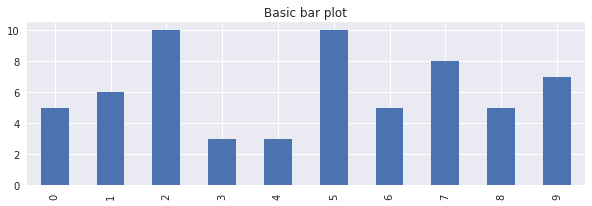

In [2]:
import numpy as np
import pandas as pd

np.random.seed(37)

s = pd.Series(np.random.randint(0, 11, size=10))

fig, ax = plt.subplots(figsize=(10, 3))

_ = s.plot(kind='bar', ax=ax)
_ = ax.set_title('Basic bar plot')

## Coloring bars

Coloring bars is controlled by the `color` argument, which expects an array of [colors](https://matplotlib.org/2.0.2/api/colors_api.html).

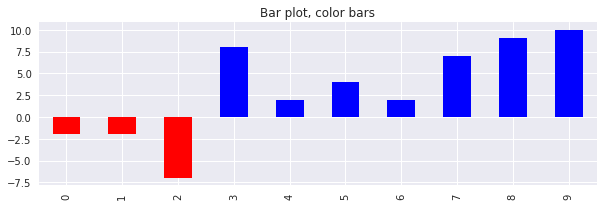

In [3]:
s = pd.Series(np.random.randint(-10, 11, size=10))

fig, ax = plt.subplots(figsize=(10, 3))

_ = s.plot(kind='bar', ax=ax, color=(s > 0).map({True: 'b', False: 'r'}))
_ = ax.set_title('Bar plot, color bars')

## Labeling bars

Labeling or annotating bars with counts or percentage relies on access to the `patches` (aka `rectangles`) associated with each bar. 

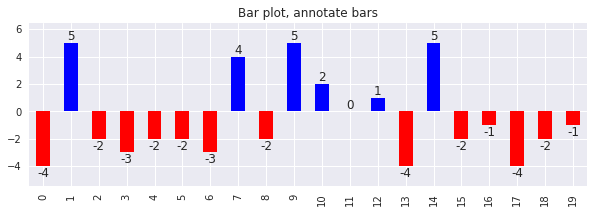

In [4]:
s = pd.Series(np.random.randint(-5, 6, size=20))

fig, ax = plt.subplots(figsize=(10, 3))

_ = s.plot(kind='bar', ax=ax, color=(s > 0).map({True: 'b', False: 'r'}))
_ = ax.set_title('Bar plot, annotate bars')

for i, v in enumerate(s.values):
    params = {
        'x': i,
        'y': v if v >= 0 else v -1.0,
        's': v,
        'horizontalalignment': 'center',
        'verticalalignment': 'bottom',
        'fontdict': {
            'fontweight': 500,
            'size': 12
        }
    }
    _ = ax.text(**params)

# increase the y min and max space of the graph
y_min, y_max = ax.get_ylim()
_ = ax.set_ylim(y_min - 1.0, y_max + 1.0)

## Hiding x-axis labels

Sometimes, plotting every label on the x-axis will result in collision of labels.

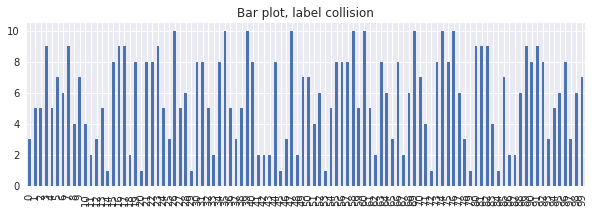

In [6]:
s = pd.Series(np.random.randint(1, 11, size=100))

fig, ax = plt.subplots(figsize=(10, 3))

_ = s.plot(kind='bar', ax=ax)
_ = ax.set_title('Bar plot, label collision')

You may show only every `n-th` label by setting all other labels' visibility to `False`.

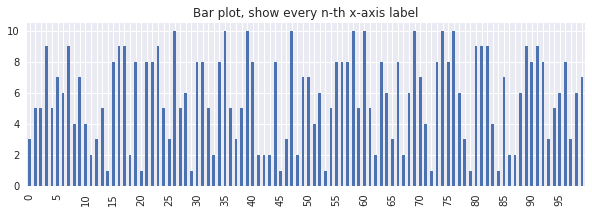

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))

_ = s.plot(kind='bar', ax=ax)
_ = ax.set_title('Bar plot, show every n-th x-axis label')

n_th = 5
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n_th != 0:
        label.set_visible(False)

## Stacked bar

In [8]:
n = 25

labels = [f'y{i}' for i in range(n)]
columns = [f'x{i}' for i in range(n)]

df = pd.DataFrame(np.random.randint(0, 11, size=(n, n)), index=labels, columns=columns)

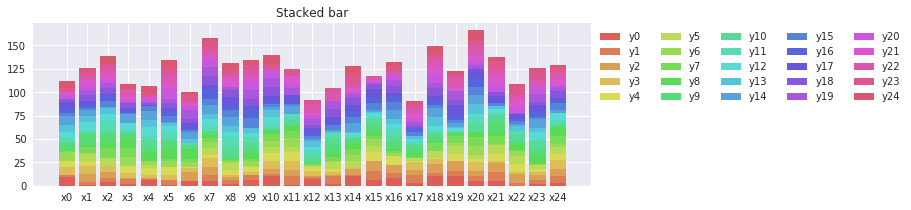

In [9]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 3))

colors = sns.color_palette('hls', df.shape[0])

prev = []
for color, label in zip(colors, labels):
    if len(prev) == 0:
        ax.bar(columns, df.loc[label], color=color, label=label)
    else:
        s = df.loc[prev].sum()
        ax.bar(columns, df.loc[label], color=color, label=label, bottom=s)
    prev.append(label)
    
_ = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=5)
_ = ax.set_title('Stacked bar')

## Stacked bar, normalized

A stacked bar plot normalized to percentages is achieved through transforming the column values to percentages (the columns must sum to 1). 

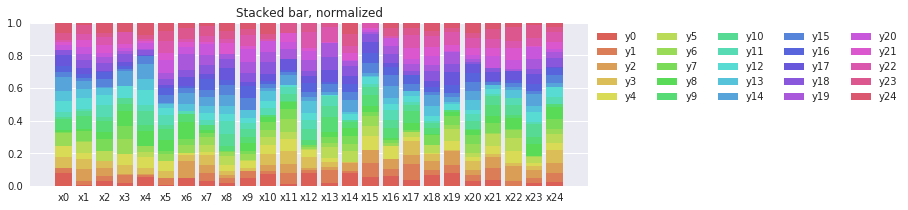

In [10]:
fig, ax = plt.subplots(figsize=(10, 3))

colors = sns.color_palette('hls', df.shape[0])

p_df = df / df.sum()
    
prev = []
for color, label in zip(colors, labels):
    if len(prev) == 0:
        ax.bar(columns, p_df.loc[label], color=color, label=label)
    else:
        s = p_df.loc[prev].sum()
        ax.bar(columns, p_df.loc[label], color=color, label=label, bottom=s)
    prev.append(label)
    
_ = ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=5)
_ = ax.set_title('Stacked bar, normalized')

## Bar, multiple series

In [11]:
n = 5
m = 10

labels = [f'y{i}' for i in range(n)]
columns = [f'x{i}' for i in range(m)]

df = pd.DataFrame(np.random.randint(0, 11, size=(n, m)), index=labels, columns=columns)

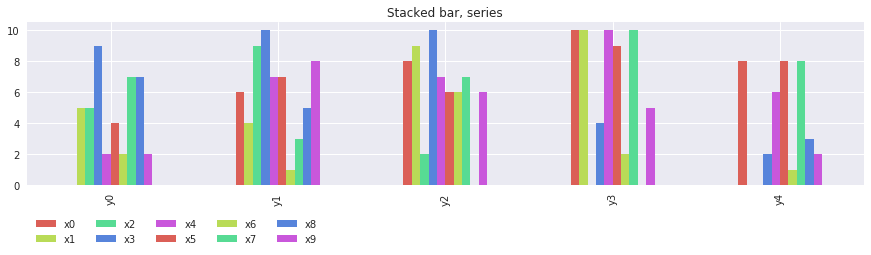

In [12]:
fig, ax = plt.subplots(figsize=(15, 3))

colors = sns.color_palette('hls', df.shape[0])

df.plot(kind='bar', color=colors, ax=ax)

_ = ax.legend(bbox_to_anchor=(0, -0.15), loc='upper left', ncol=5)
_ = ax.set_title('Stacked bar, series')